# Aprendizaje de Máquina I - Trabajo Práctico

Karen Raczkowski

## Tabla de contenido

1. **[Importar librerías](#1-importar-librerías)**<br>
2. **[Cargar datos](#2-cargar-datos)**<br>
3. **[Análisis exploratorio básico y preprocesamiento de los datos](#3-análisis-exploratorio-básico-y-preprocesamiento-de-los-datos)**<br>
4. **[Entrenamiento de modelos](#4-entrenamiento-de-modelos)**<br>
   4.1 **[Transfer](#41-transfer)**<br>
         <small>4.1.1 [Regresión logística](#411-regresión-logística)<br>
         4.1.2 [Random Forest](#412-random-forest)<br>
         4.1.3 [XGBoost](#413-xgboost)<br>
         4.1.4 [Comparación de modelos](#414-comparación-de-modelos)<br>
         4.1.5 [Modelo final para Transfer](#415-modelo-final-para-transfer)<br></small>
   4.2 **[Cash out](#42-cash_out)**<br>
         <small>4.2.1 [Regresión logística](#421-regresión-logística)<br>
         4.2.2 [Random Forest](#422-random-forest)<br>
         4.2.3 [XGBoost](#423-xgboost)<br>
         4.2.4 [Comparación de modelos](#424-comparación-de-modelos)<br>
         4.2.5 [Modelo final para Cash out](#425-modelo-final-para-cash_out)<br></small>
   4.3 **[Dataset entero](#43-dataset-entero)**<br>
         <small>4.3.1 [Regresión logística](#431-regresión-logística)<br>
         4.3.2 [Random Forest](#432-random-forest)<br>
         4.3.3 [XGBoost](#433-xgboost)<br>
         4.3.4 [Comparación de modelos](#434-comparación-de-modelos)<br>
         4.3.5 [Modelo final sin segmentar](#435-modelo-final-con-el-dataset-entero)<br></small>
5. **[Comparación de modelos segmentados y no segmentados](#5-comparación-de-modelos-segmentados-y-no-segmentados)**<br>
6. **[Conclusiones](#6-conclusiones)**<br>

## 1. Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import xgboost as xgb

## 2. Cargar datos

In [2]:
data = pd.read_csv(r'C:\Users\karen\OneDrive\Escritorio\Especializacion\ML1\data\fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## 3. Análisis exploratorio básico y preprocesamiento de los datos

In [3]:
# Me fijo si hay observaciones duplicadas
duplic = data.duplicated()
num_duplicates = duplic.sum()
print("Cantidad de filas duplicadas:", num_duplicates)

Cantidad de filas duplicadas: 0


In [3]:
# Eliminar columnas irrelevantes 
data = data.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [4]:
data.shape

(6362620, 8)

In [98]:
# Veo si hay missing values
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [99]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [100]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [101]:
# Separo tipos de variables para analizar

# Obtener los nombres de las columnas categóricas
cat_cols = data.select_dtypes(include='object').columns
print("Variables categóricas en el dataset:")
for col in cat_cols:
    print(col)

# Obtener los nombres de las columnas numéricas
num_cols = data.select_dtypes(include='number').columns
print("Variables numéricas en el dataset:")
for col in num_cols:
    print(col)

Variables categóricas en el dataset:
type
Variables numéricas en el dataset:
step
amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest
isFraud


In [104]:
#isFraud es categórica
num_cols = num_cols.drop(["isFraud"])

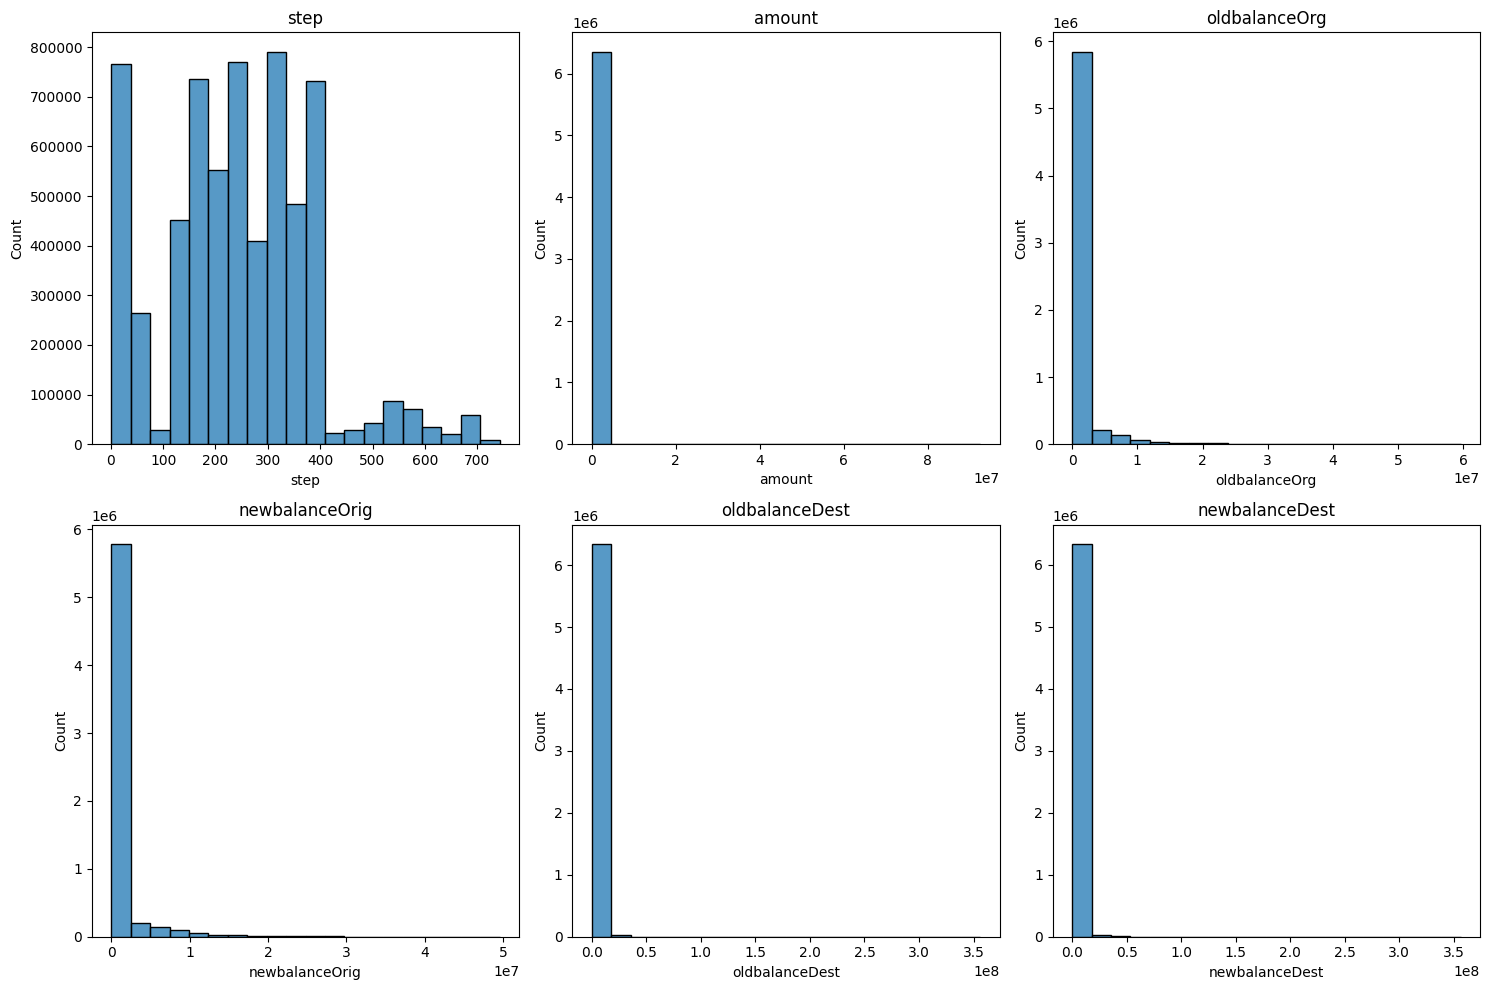

In [105]:
# Explorar las variables numéricas
if num_cols.any():
    num_col = 3
    num_row = -(-len(num_cols) // num_col)  # ceil division
    fig, axs = plt.subplots(nrows=num_row, ncols=num_col, figsize=(15, 5*num_row))

    for i, col in enumerate(num_cols):
        row = i // num_col
        sns.histplot(data[col], ax=axs[row, i % num_col], bins=20)
        axs[row, i % num_col].set(title=col)

    plt.tight_layout()
    plt.savefig('histograms.png', dpi=300)
    plt.show()
else:
    print("No hay variables numéricas en los datos.")

In [106]:
# Verificar el balance de clases
fraud_count = data["isFraud"].sum()
non_fraud_count = len(data) - fraud_count
fraud_percentage = (fraud_count / len(data)) * 100
non_fraud_percentage = 100 - fraud_percentage
print(f"Transacciones fraudulentas: {fraud_count} ({fraud_percentage:.2f}%)")
print(f"Transacciones no fraudulentas: {non_fraud_count} ({non_fraud_percentage:.2f}%)")

Transacciones fraudulentas: 8213 (0.13%)
Transacciones no fraudulentas: 6354407 (99.87%)


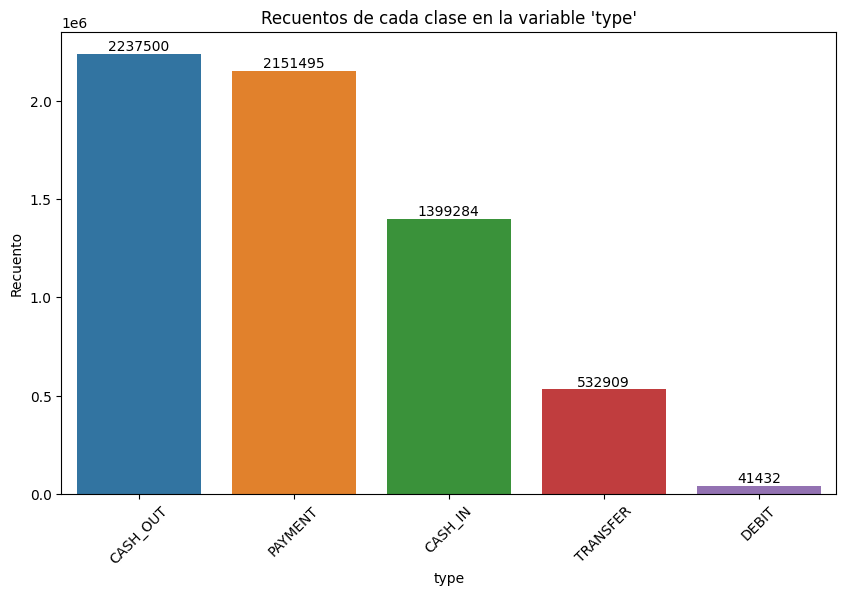

In [107]:
# Exploro los tipos de transacción

# Obtener los recuentos de cada clase
counts = data['type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts.index, y=counts.values)
plt.title(f"Recuentos de cada clase en la variable '{'type'}'")
plt.xlabel('type')
plt.ylabel("Recuento")
plt.xticks(rotation=45)

# Agregar los valores en las barras
for i, count in enumerate(counts.values):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

In [4]:
# Calcular los recuentos de cada categoría y la cantidad de elementos fraudulentos y no fraudulentos
counts = data['type'].value_counts()
fraud_counts = data[data['isFraud'] == 1]['type'].value_counts()
non_fraud_counts = data[data['isFraud'] == 0]['type'].value_counts()

# Crear la tabla
tabla = pd.DataFrame({'Recuento total': counts, 'Recuento de fraudes': fraud_counts, 'Recuento de no fraudes': non_fraud_counts})
tabla.index.name = 'type'

print(tabla)

          Recuento total  Recuento de fraudes  Recuento de no fraudes
type                                                                 
CASH_IN          1399284                  NaN                 1399284
CASH_OUT         2237500               4116.0                 2233384
DEBIT              41432                  NaN                   41432
PAYMENT          2151495                  NaN                 2151495
TRANSFER          532909               4097.0                  528812


Sólo hay transacciones fraudulentas en CASH_OUT y TRANSFER.

In [5]:
types = data['type'].unique()

for type_value in types:
    globals()[f"{type_value.lower()}_df"] = data[data['type'] == type_value].copy()
    globals()[f"{type_value.lower()}_df"].drop('type', axis=1, inplace=True)

In [96]:
transfer_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,181.00,181.00,0.0,0.00,0.00,1
19,1,215310.30,705.00,0.0,22425.00,0.00,0
24,1,311685.89,10835.00,0.0,6267.00,2719172.89,0
58,1,62610.80,79114.00,16503.2,517.00,8383.29,0
78,1,42712.39,10363.39,0.0,57901.66,24044.18,0


In [97]:
cash_out_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
3,1,181.00,181.00,0.0,21182.0,0.00,1
15,1,229133.94,15325.00,0.0,5083.0,51513.44,0
42,1,110414.71,26845.41,0.0,288800.0,2415.16,0
47,1,56953.90,1942.02,0.0,70253.0,64106.18,0
48,1,5346.89,0.00,0.0,652637.0,6453430.91,0


Dado que sólo TRANSFER y CASH_OUT tienen transacciones fraudulentas, se empieza el ejercicio probando modelos para estos segmentos. Más adelante se compara con un modelo entrenado con el dataset entero.

## 4. Entrenamiento de modelos

Para incorporar la optimización de las ganancias en el entrenamiento del modelo de clasificación, se puede usar Cost-Sensitive Learning. El objetivo es ajustar el equilibrio entre la clase positiva (fraude) y la clase negativa (no fraude) para mejorar el rendimiento del modelo en la detección de la clase minoritaria (fraude) teniendo en cuenta determinada función de costo.

En este caso, se busca maximizar la ganancia esperada teniendo en cuenta que por cada transacción aprobada el porcentaje de ganancia es de un 20% y por cada fraude aprobado se pierde el 100% del dinero de la transacción. Para lograr esto, se van a definir manualmente diferentes pesos de clase, calcular la ganancia esperada para cada configuración de pesos de clase y seleccionar el modelo que obtenga la ganancia neta más alta. Este enfoque considera tanto el desequilibrio de clases como la ganancia esperada, lo que permite evaluar y seleccionar el modelo que ofrece el mejor equilibrio entre la precisión en la detección de casos de fraude y la ganancia asociada a esos casos.

Es importante tener en cuenta que el ajuste de los pesos de clase es una de las estrategias para manejar el desequilibrio de clases, pero hay otras técnicas disponibles, como el submuestreo, el sobremuestreo, la generación sintética y el uso de algoritmos específicos para desequilibrio de clases. La elección de la técnica adecuada depende del problema específico y de las características de los datos.

### 4.1 Transfer

In [112]:
# Verificar el balance de clases
fraud_count = transfer_df["isFraud"].sum()
non_fraud_count = len(transfer_df) - fraud_count
fraud_percentage = (fraud_count / len(transfer_df)) * 100
non_fraud_percentage = 100 - fraud_percentage
print(f"Transacciones fraudulentas: {fraud_count} ({fraud_percentage:.2f}%)")
print(f"Transacciones no fraudulentas: {non_fraud_count} ({non_fraud_percentage:.2f}%)")

Transacciones fraudulentas: 4097 (0.77%)
Transacciones no fraudulentas: 528812 (99.23%)


In [6]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = transfer_df.drop('isFraud', axis=1)
y = transfer_df['isFraud']

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3243756,250,3315876.61,5412.0,0.0,94702.35,3410578.96
4938043,350,1196860.54,57074.0,0.0,69766.62,1266627.15
5083950,355,261328.52,40006.0,0.0,0.00,261328.52
336698,16,466989.62,137.0,0.0,0.00,787420.08
1317264,136,487035.87,159111.0,0.0,0.00,487035.87


In [9]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)  # Estandarizamos los datos de entrenamiento
X_test_sc = scaler.transform(X_test)  # Aplicamos la misma transformación a los datos de prueba
X_test_df = pd.DataFrame(X_test_sc)
X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.head()

,0,1,2,3,4,5
0,0.023845,1.286311,-0.112077,-0.040191,-0.411442,-0.018442
1,0.713620,0.153542,0.006025,-0.040191,-0.415603,-0.310889
2,0.748108,-0.346568,-0.032994,-0.040191,-0.427246,-0.448018
3,-1.590227,-0.236627,-0.124136,-0.040191,-0.427246,-0.376256
4,-0.762498,-0.225911,0.239285,-0.040191,-0.427246,-0.417230


#### 4.1.1 Regresión logística

Iteración: 1
Peso de clase: 1.0
--------------------
Iteración: 2
Peso de clase: 1.18
--------------------
Iteración: 3
Peso de clase: 1.37
--------------------
Iteración: 4
Peso de clase: 1.55
--------------------
Iteración: 5
Peso de clase: 1.73
--------------------
Iteración: 6
Peso de clase: 1.92
--------------------
Iteración: 7
Peso de clase: 2.1
--------------------
Iteración: 8
Peso de clase: 2.29
--------------------
Iteración: 9
Peso de clase: 2.47
--------------------
Iteración: 10
Peso de clase: 2.65
--------------------
Iteración: 11
Peso de clase: 2.84
--------------------
Iteración: 12
Peso de clase: 3.02
--------------------
Iteración: 13
Peso de clase: 3.2
--------------------
Iteración: 14
Peso de clase: 3.39
--------------------
Iteración: 15
Peso de clase: 3.57
--------------------
Iteración: 16
Peso de clase: 3.76
--------------------
Iteración: 17
Peso de clase: 3.94
--------------------
Iteración: 18
Peso de clase: 4.12
--------------------
Iteración: 19
Peso de 

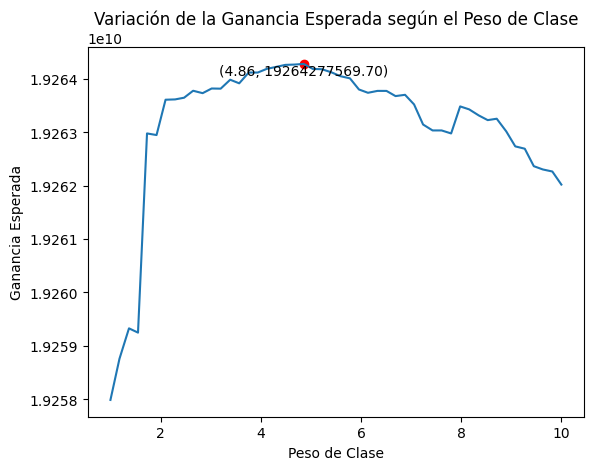

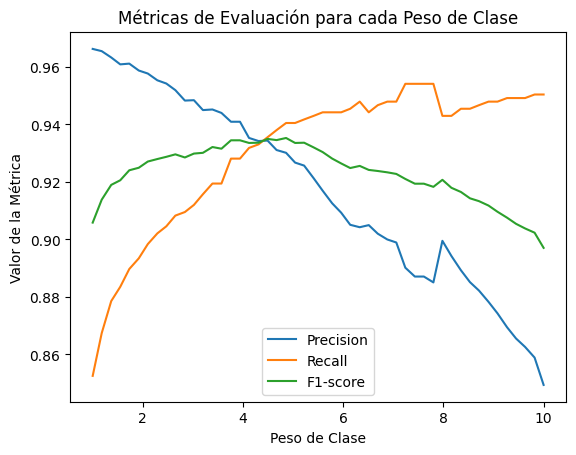

In [117]:
# Definir los diferentes pesos para ajustar el equilibrio de clases
# Probé primero con valores hasta el inverso del desequilibrio de clase, pero con pesos mayores a 10 la ganancia solo cae
# desbalance = 1/0.0077
# weights = np.linspace(1, desbalance, 30) 
weights = np.linspace(1, 10, 50) 
weights = np.round(weights, decimals=2)
profits = []
#accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Iterar sobre los diferentes pesos de clase
for i, weight in enumerate(weights):
    # Itero los distintos pesos para la clase fraude, por default se le asigna un peso de 1 a la clase no fraude
    class_weights = {0: 1, 1: weight} 

    # Crear y entrenar el modelo con los pesos de clase modificados
    model = LogisticRegressionCV(random_state=42, class_weight=class_weights, max_iter=100)
    model.fit(X_train_sc, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_sc)

    # Calcular las métricas de evaluación
    #accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    #accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calcular las ganancias utilizando los porcentajes de ganancia y pérdida definidos
    results = X_test.copy()
    results['y_pred'] = y_pred
    results['y_test'] = y_test
    results['TP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 1), 1, 0)
    results['TN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 0), 1, 0)
    results['FP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 0), 1, 0)
    results['FN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 1), 1, 0)
    profit = (0.2 * results.loc[results['TN'] == 1, 'amount'].sum()) - results.loc[results['FN'] == 1, 'amount'].sum()
    profits.append(profit)

    # Imprimir los resultados
    print("Iteración:", i+1)
    print("Peso de clase:", weight)
    # print(classification_report(y_test,y_pred))
    print("--------------------")

# Gráfico de ganancias
max_index = profits.index(max(profits))
plt.plot(weights, profits)
plt.scatter(weights[max_index], profits[max_index], color='red', marker='o')
plt.xlabel('Peso de Clase')
plt.ylabel('Ganancia Esperada')
plt.title('Variación de la Ganancia Esperada según el Peso de Clase')
plt.annotate(f'({weights[max_index]}, {profits[max_index]:.2f})', xy=(weights[max_index], profits[max_index]),
             xytext=(weights[max_index], profits[max_index]-50),
             ha='center', va='top')
plt.show()

# Gráfico de métricas
# plt.plot(weights, accuracy_scores, label='Accuracy') # no tiene sentido ver accuracy con este nivel de desbalance
plt.plot(weights, precision_scores, label='Precision')
plt.plot(weights, recall_scores, label='Recall')
plt.plot(weights, f1_scores, label='F1-score')
plt.xlabel('Peso de Clase')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas de Evaluación para cada Peso de Clase')
plt.legend()
plt.show()

Pruebo usando pesos menores para la clase mayoritaria

Iteración: 1
Peso de clase: 1.0
--------------------
Iteración: 2
Peso de clase: 1.03
--------------------
Iteración: 3
Peso de clase: 1.07
--------------------
Iteración: 4
Peso de clase: 1.1
--------------------
Iteración: 5
Peso de clase: 1.14
--------------------
Iteración: 6
Peso de clase: 1.17
--------------------
Iteración: 7
Peso de clase: 1.21
--------------------
Iteración: 8
Peso de clase: 1.24
--------------------
Iteración: 9
Peso de clase: 1.28
--------------------
Iteración: 10
Peso de clase: 1.31
--------------------
Iteración: 11
Peso de clase: 1.34
--------------------
Iteración: 12
Peso de clase: 1.38
--------------------
Iteración: 13
Peso de clase: 1.41
--------------------
Iteración: 14
Peso de clase: 1.45
--------------------
Iteración: 15
Peso de clase: 1.48
--------------------
Iteración: 16
Peso de clase: 1.52
--------------------
Iteración: 17
Peso de clase: 1.55
--------------------
Iteración: 18
Peso de clase: 1.59
--------------------
Iteración: 19
Peso de

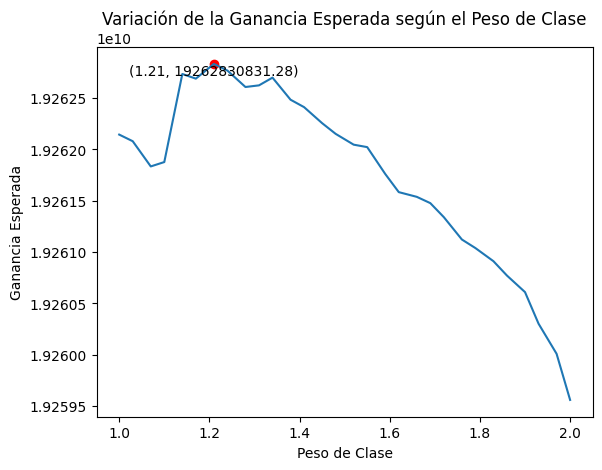

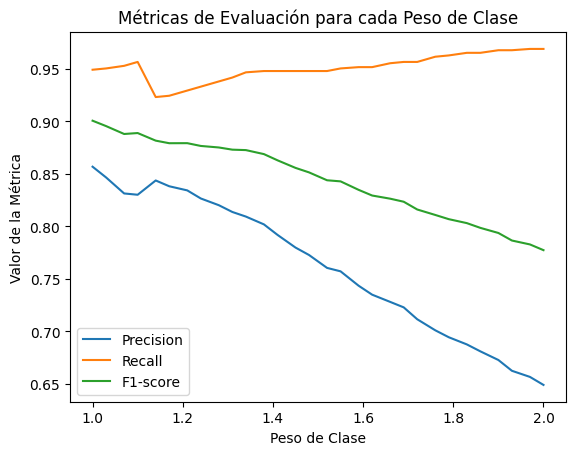

In [118]:
# Definir los diferentes pesos para ajustar el equilibrio de clases
weights = np.linspace(1, 2, 30) 
weights = np.round(weights, decimals=2)
profits = []
precision_scores = []
recall_scores = []
f1_scores = []

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Iterar sobre los diferentes pesos de clase
for i, weight in enumerate(weights):
    # Itero los distintos pesos para la clase fraude, se le asigna un peso de 0.1 a la clase no fraude
    class_weights = {0: 0.1, 1: weight} 

    # Crear y entrenar el modelo con los pesos de clase modificados
    model = LogisticRegressionCV(random_state=42, class_weight=class_weights, max_iter=100)
    model.fit(X_train_sc, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_sc)

    # Calcular las métricas de evaluación
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calcular las ganancias utilizando los porcentajes de ganancia y pérdida definidos
    results = X_test.copy()
    results['y_pred'] = y_pred
    results['y_test'] = y_test
    results['TP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 1), 1, 0)
    results['TN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 0), 1, 0)
    results['FP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 0), 1, 0)
    results['FN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 1), 1, 0)
    profit = (0.2 * results.loc[results['TN'] == 1, 'amount'].sum()) - results.loc[results['FN'] == 1, 'amount'].sum()
    profits.append(profit)

    # Imprimir los resultados
    print("Iteración:", i+1)
    print("Peso de clase:", weight)
    # print(classification_report(y_test,y_pred))
    print("--------------------")

# Gráfico de ganancias
max_index = profits.index(max(profits))
plt.plot(weights, profits)
plt.scatter(weights[max_index], profits[max_index], color='red', marker='o')
plt.xlabel('Peso de Clase')
plt.ylabel('Ganancia Esperada')
plt.title('Variación de la Ganancia Esperada según el Peso de Clase')
plt.annotate(f'({weights[max_index]}, {profits[max_index]:.2f})', xy=(weights[max_index], profits[max_index]),
             xytext=(weights[max_index], profits[max_index]-50),
             ha='center', va='top')
plt.show()

# Gráfico de métricas
plt.plot(weights, precision_scores, label='Precision')
plt.plot(weights, recall_scores, label='Recall')
plt.plot(weights, f1_scores, label='F1-score')
plt.xlabel('Peso de Clase')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas de Evaluación para cada Peso de Clase')
plt.legend()
plt.show()

#### 4.1.2 Random forest

Iteración: 1
Peso de clase: 1.0
--------------------
Iteración: 2
Peso de clase: 5.44
--------------------
Iteración: 3
Peso de clase: 9.89
--------------------
Iteración: 4
Peso de clase: 14.33
--------------------
Iteración: 5
Peso de clase: 18.78
--------------------
Iteración: 6
Peso de clase: 23.22
--------------------
Iteración: 7
Peso de clase: 27.66
--------------------
Iteración: 8
Peso de clase: 32.11
--------------------
Iteración: 9
Peso de clase: 36.55
--------------------
Iteración: 10
Peso de clase: 40.99
--------------------
Iteración: 11
Peso de clase: 45.44
--------------------
Iteración: 12
Peso de clase: 49.88
--------------------
Iteración: 13
Peso de clase: 54.33
--------------------
Iteración: 14
Peso de clase: 58.77
--------------------
Iteración: 15
Peso de clase: 63.21
--------------------
Iteración: 16
Peso de clase: 67.66
--------------------
Iteración: 17
Peso de clase: 72.1
--------------------
Iteración: 18
Peso de clase: 76.54
--------------------
Iterac

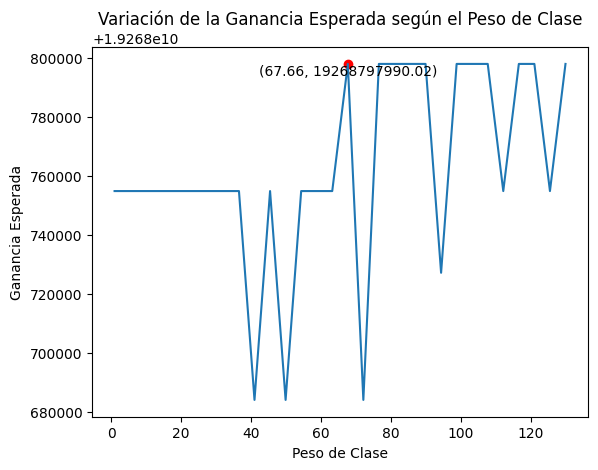

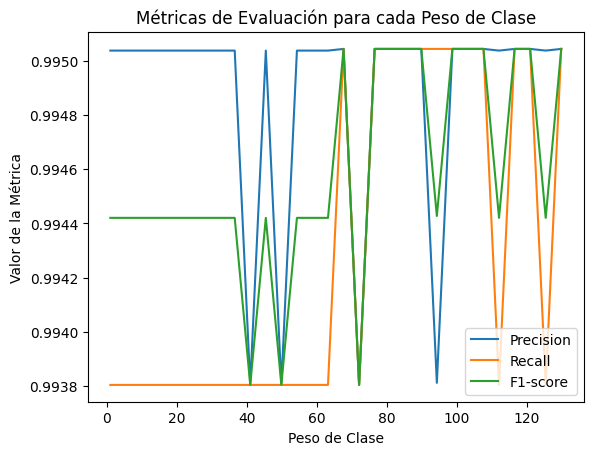

In [119]:
# Definir los diferentes pesos para ajustar el equilibrio de clases
desbalance = 1/0.0077
weights = np.linspace(1, desbalance, 30) 
# weights = np.linspace(1, 10, 20) 
weights = np.round(weights, decimals=2)
profits = []
#accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Iterar sobre los diferentes pesos de clase
for i, weight in enumerate(weights):
    # Itero los distintos pesos para la clase fraude, por default se le asigna un peso de 1 a la clase no fraude
    class_weights = {0: 1, 1: weight} 

    # Crear y entrenar el modelo con los pesos de clase modificados
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
    model.fit(X_train_sc, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_sc)

    # Calcular las métricas de evaluación
    #accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    #accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calcular las ganancias utilizando los porcentajes de ganancia y pérdida definidos
    results = X_test.copy()
    results['y_pred'] = y_pred
    results['y_test'] = y_test
    results['TP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 1), 1, 0)
    results['TN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 0), 1, 0)
    results['FP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 0), 1, 0)
    results['FN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 1), 1, 0)
    profit = (0.2 * results.loc[results['TN'] == 1, 'amount'].sum()) - results.loc[results['FN'] == 1, 'amount'].sum()
    profits.append(profit)

    # Imprimir los resultados
    print("Iteración:", i+1)
    print("Peso de clase:", weight)
    # print(classification_report(y_test,y_pred))
    print("--------------------")

# Gráfico de ganancias
max_index = profits.index(max(profits))
plt.plot(weights, profits)
plt.scatter(weights[max_index], profits[max_index], color='red', marker='o')
plt.xlabel('Peso de Clase')
plt.ylabel('Ganancia Esperada')
plt.title('Variación de la Ganancia Esperada según el Peso de Clase')
plt.annotate(f'({weights[max_index]}, {profits[max_index]:.2f})', xy=(weights[max_index], profits[max_index]),
             xytext=(weights[max_index], profits[max_index]-50),
             ha='center', va='top')
plt.show()

# Gráfico de métricas
# plt.plot(weights, accuracy_scores, label='Accuracy') # no tiene sentido ver accuracy con este nivel de desbalance
plt.plot(weights, precision_scores, label='Precision')
plt.plot(weights, recall_scores, label='Recall')
plt.plot(weights, f1_scores, label='F1-score')
plt.xlabel('Peso de Clase')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas de Evaluación para cada Peso de Clase')
plt.legend()
plt.show()

#### 4.1.3 XGBoost

Iteración: 1
Peso de clase: 1.0
--------------------
Iteración: 2
Peso de clase: 5.44
--------------------
Iteración: 3
Peso de clase: 9.89
--------------------
Iteración: 4
Peso de clase: 14.33
--------------------
Iteración: 5
Peso de clase: 18.78
--------------------
Iteración: 6
Peso de clase: 23.22
--------------------
Iteración: 7
Peso de clase: 27.66
--------------------
Iteración: 8
Peso de clase: 32.11
--------------------
Iteración: 9
Peso de clase: 36.55
--------------------
Iteración: 10
Peso de clase: 40.99
--------------------
Iteración: 11
Peso de clase: 45.44
--------------------
Iteración: 12
Peso de clase: 49.88
--------------------
Iteración: 13
Peso de clase: 54.33
--------------------
Iteración: 14
Peso de clase: 58.77
--------------------
Iteración: 15
Peso de clase: 63.21
--------------------
Iteración: 16
Peso de clase: 67.66
--------------------
Iteración: 17
Peso de clase: 72.1
--------------------
Iteración: 18
Peso de clase: 76.54
--------------------
Iterac

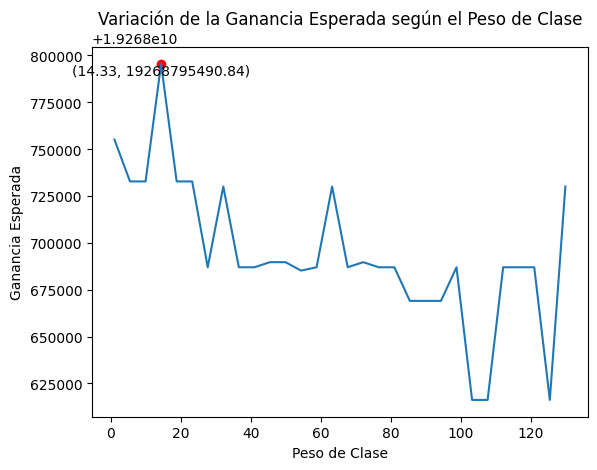

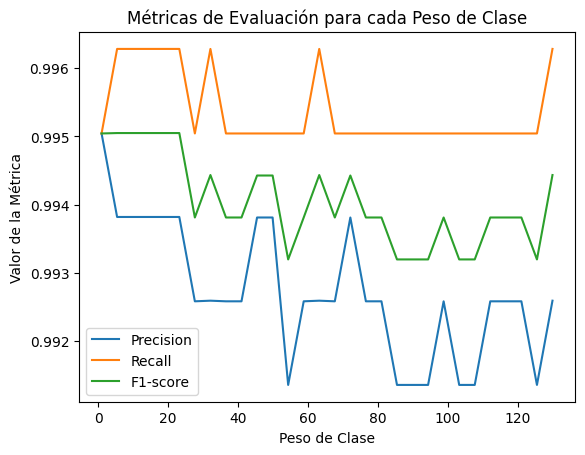

In [121]:
# Definir los diferentes pesos para ajustar el equilibrio de clases
desbalance = 1/0.0077
weights = np.linspace(1, desbalance, 30) 
# weights = np.linspace(1, 10, 20) 
weights = np.round(weights, decimals=2)
profits = []
#accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Iterar sobre los diferentes pesos de clase
for i, weight in enumerate(weights):
    # Itero los distintos pesos para la clase fraude, por default se le asigna un peso de 1 a la clase no fraude
    class_weights = {0: 1, 1: weight} 

    # Crear y entrenar el modelo con los pesos de clase modificados
    model = xgb.XGBClassifier(random_state=42, scale_pos_weight=weight)
    model.fit(X_train_sc, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_sc)

    # Calcular las métricas de evaluación
    #accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    #accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calcular las ganancias utilizando los porcentajes de ganancia y pérdida definidos
    results = X_test.copy()
    results['y_pred'] = y_pred
    results['y_test'] = y_test
    results['TP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 1), 1, 0)
    results['TN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 0), 1, 0)
    results['FP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 0), 1, 0)
    results['FN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 1), 1, 0)
    profit = (0.2 * results.loc[results['TN'] == 1, 'amount'].sum()) - results.loc[results['FN'] == 1, 'amount'].sum()
    profits.append(profit)

    # Imprimir los resultados
    print("Iteración:", i+1)
    print("Peso de clase:", weight)
    # print(classification_report(y_test,y_pred))
    print("--------------------")

# Gráfico de ganancias
max_index = profits.index(max(profits))
plt.plot(weights, profits)
plt.scatter(weights[max_index], profits[max_index], color='red', marker='o')
plt.xlabel('Peso de Clase')
plt.ylabel('Ganancia Esperada')
plt.title('Variación de la Ganancia Esperada según el Peso de Clase')
plt.annotate(f'({weights[max_index]}, {profits[max_index]:.2f})', xy=(weights[max_index], profits[max_index]),
             xytext=(weights[max_index], profits[max_index]-50),
             ha='center', va='top')
plt.show()

# Gráfico de métricas
# plt.plot(weights, accuracy_scores, label='Accuracy') # no tiene sentido ver accuracy con este nivel de desbalance
plt.plot(weights, precision_scores, label='Precision')
plt.plot(weights, recall_scores, label='Recall')
plt.plot(weights, f1_scores, label='F1-score')
plt.xlabel('Peso de Clase')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas de Evaluación para cada Peso de Clase')
plt.legend()
plt.show()

#### 4.1.4 Comparación de modelos

In [17]:
# Defino funcion de lineas que se van a repetir varias veces
def compare():
    # Predicciones y métricas
    models = ['Logistic Regression', 'Random Forest', 'XGBoost']
    metrics = ['Recall', 'Precision', 'F1-Score', 'Accuracy', 'AUPRC', 'Profit']

    # Predicciones
    lr_preds = lr_model.predict(X_test_sc)
    rf_preds = rf_model.predict(X_test_sc)
    xgb_preds = xgb_model.predict(X_test_sc)

    # Crear un diccionario para mapear los nombres de los modelos con las predicciones
    model_preds = {
        'Logistic Regression': lr_preds,
        'Random Forest': rf_preds,
        'XGBoost': xgb_preds}

    # Crear un Dataframe para almacenar los resultados de las métricas
    results = pd.DataFrame(index=model_preds.keys(), columns=metrics)
    # Calcular las métricas para cada modelo
    for model, preds in model_preds.items():
        results.loc[model, 'Recall'] = recall_score(y_test, preds)
        results.loc[model, 'Precision'] = precision_score(y_test, preds)
        results.loc[model, 'F1-Score'] = f1_score(y_test, preds)
        results.loc[model, 'Accuracy'] = accuracy_score(y_test, preds)
        results.loc[model, 'AUPRC'] = average_precision_score(y_test, preds)

    # Calcular la ganancia neta para cada modelo
    pred = X_test.copy()
    pred['y_test'] = y_test
    pred['pred_Logistic Regression'] = lr_preds
    pred['pred_Random Forest'] = rf_preds
    pred['pred_XGBoost'] = xgb_preds

    for model, preds in model_preds.items():
        pred['TN_' + str(model)] = np.where((pred['pred_'+ str(model)] == 0) & (pred['y_test'] == 0), 1, 0)
        pred['FN_' + str(model)] = np.where((pred['pred_'+ str(model)] == 0) & (pred['y_test'] == 1), 1, 0)
        results.loc[model, 'Profit'] = (0.2 * pred.loc[pred['TN_'+ str(model)] == 1, 'amount'].sum()) - pred.loc[pred['FN_'+ str(model)] == 1, 'amount'].sum()

    return results

In [13]:
def evaluar(y_test, y_train, y_pred, y_pred_is):

    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred))
    print('AUC-ROC:', roc_auc_score(y_test, y_pred))
    print(classification_report(y_test,y_pred))

    cm = confusion_matrix(y_train, y_pred_is)
    sns.heatmap(cm, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de confusion - train data')
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de confusion - test data')
    plt.show()

In [152]:
# Modelos y pesos de clase con mayor ganancia neta
peso_opt_lr = 4.86
peso_opt_rf = 67.66
peso_opt_xgb = 14.33

# Regresión Logística
lr_model = LogisticRegressionCV(random_state=42, class_weight={0: 1, 1: peso_opt_lr}, max_iter=100)
lr_model.fit(X_train_sc, y_train)
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: peso_opt_rf})
rf_model.fit(X_train_sc, y_train)
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=peso_opt_xgb)
xgb_model.fit(X_train_sc, y_train)

compare()

,Recall,Precision,F1-Score,Accuracy,AUPRC,Profit
Logistic Regression,0.94052,0.930147,0.935305,0.999015,0.875273,19264277569.698002
Random Forest,0.995043,0.995043,0.995043,0.999925,0.990149,19268797990.021999
XGBoost,0.996283,0.99382,0.99505,0.999925,0.990153,19268795490.838001


#### 4.1.5 Modelo final para TRANSFER

El modelo con mejor ganancia neta fue un Random Forest con class_weights = {0: 1, 1: 67.66} 

Accuracy: 0.9999249404214595
Precision: 0.9950433705080545
Recall: 0.9950433705080545
F1: 0.9950433705080545
AUC-ROC: 0.9975027771944668
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105775
           1       1.00      1.00      1.00       807

    accuracy                           1.00    106582
   macro avg       1.00      1.00      1.00    106582
weighted avg       1.00      1.00      1.00    106582



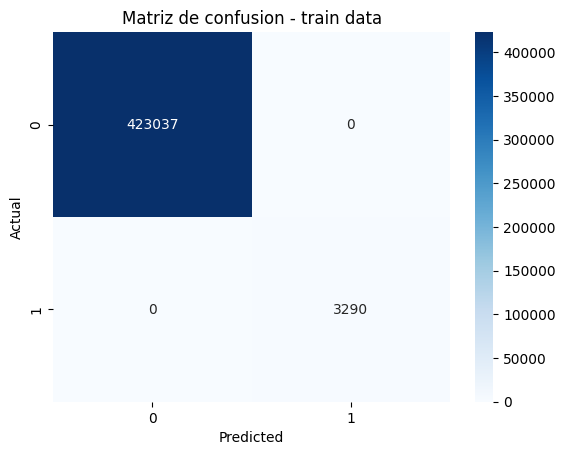

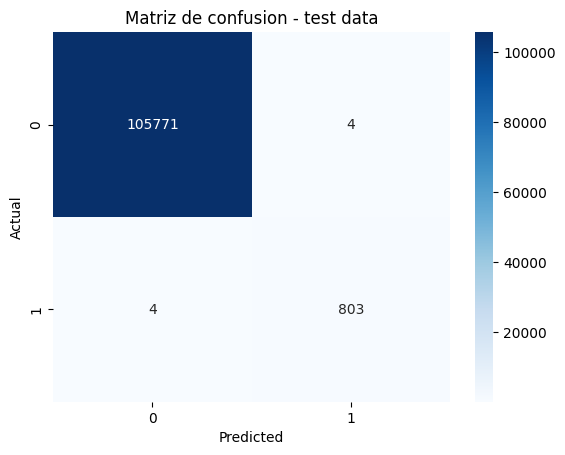

In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 67.66})
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
y_pred_is = model.predict(X_train_sc)

# Métricas de evaluación
evaluar(y_test, y_train, y_pred, y_pred_is)

### 4.2 Cash_out

In [9]:
# Verificar el balance de clases
fraud_count = cash_out_df["isFraud"].sum()
non_fraud_count = len(cash_out_df) - fraud_count
fraud_percentage = (fraud_count / len(cash_out_df)) * 100
non_fraud_percentage = 100 - fraud_percentage
print(f"Transacciones fraudulentas: {fraud_count} ({fraud_percentage:.2f}%)")
print(f"Transacciones no fraudulentas: {non_fraud_count} ({non_fraud_percentage:.2f}%)")

Transacciones fraudulentas: 4116 (0.18%)
Transacciones no fraudulentas: 2233384 (99.82%)


In [10]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = cash_out_df.drop('isFraud', axis=1)
y = cash_out_df['isFraud']

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Verificar el balance de clases en train set
fraud_count = y_train.sum()
non_fraud_count = len(y_train) - fraud_count
fraud_percentage = (fraud_count / len(y_train)) * 100
non_fraud_percentage = 100 - fraud_percentage
print(f"Fraudulent transactions: {fraud_count} ({fraud_percentage:.2f}%)")
print(f"Non-fraudulent transactions: {non_fraud_count} ({non_fraud_percentage:.2f}%)")

Fraudulent transactions: 3279 (0.18%)
Non-fraudulent transactions: 1786721 (99.82%)


In [13]:
X_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2886605,228,280552.81,204968.33,0.00,1432809.08,1713361.89
4856563,347,460820.30,54980.00,0.00,55726.68,516546.98
1776745,162,79118.36,70297.00,0.00,98344.79,177463.15
4608151,329,136339.64,0.00,0.00,6420331.26,6556670.90
1472786,141,53092.84,366067.00,312974.16,85463.30,138556.14


In [14]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)  # Estandarizamos los datos de entrenamiento
X_test_sc = scaler.transform(X_test)  # Aplicamos la misma transformación a los datos de prueba
X_test_df = pd.DataFrame(X_test_sc)
X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.head()

,0,1,2,3,4,5
0,-0.091756,0.593723,0.882097,-0.158226,-0.017550,0.006359
1,0.753389,1.619781,0.049769,-0.158226,-0.396758,-0.320487
2,-0.560492,-0.552813,0.134767,-0.158226,-0.385022,-0.413090
3,0.625552,-0.227118,-0.255331,-0.158226,1.355866,1.329053
4,-0.709636,-0.700947,1.776079,2.675079,-0.388569,-0.423715


#### 4.2.1 Regresión logística

Iteración: 1
Peso de clase: 1.0
--------------------
Iteración: 2
Peso de clase: 1.47
--------------------
Iteración: 3
Peso de clase: 1.95
--------------------
Iteración: 4
Peso de clase: 2.42
--------------------
Iteración: 5
Peso de clase: 2.89
--------------------
Iteración: 6
Peso de clase: 3.37
--------------------
Iteración: 7
Peso de clase: 3.84
--------------------
Iteración: 8
Peso de clase: 4.32
--------------------
Iteración: 9
Peso de clase: 4.79
--------------------
Iteración: 10
Peso de clase: 5.26
--------------------
Iteración: 11
Peso de clase: 5.74
--------------------
Iteración: 12
Peso de clase: 6.21
--------------------
Iteración: 13
Peso de clase: 6.68
--------------------
Iteración: 14
Peso de clase: 7.16
--------------------
Iteración: 15
Peso de clase: 7.63
--------------------
Iteración: 16
Peso de clase: 8.11
--------------------
Iteración: 17
Peso de clase: 8.58
--------------------
Iteración: 18
Peso de clase: 9.05
--------------------
Iteración: 19
Peso d

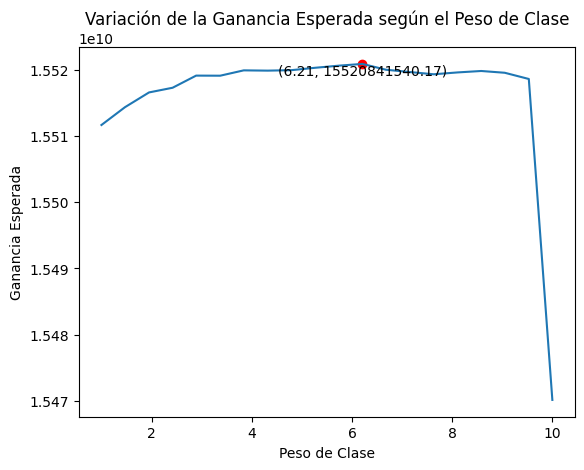

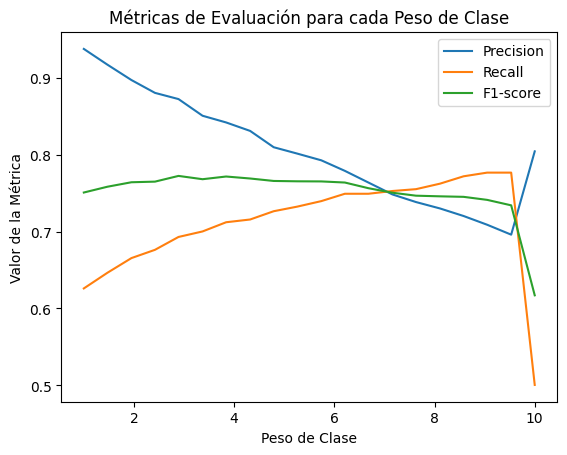

In [161]:
# Definir los diferentes pesos para ajustar el equilibrio de clases
# Probé primero con valores hasta el inverso del desequilibrio de clase, pero con pesos mayores a 10 la ganancia solo cae
# desbalance = 1/0.0018
# weights = np.linspace(1, desbalance, 5) 
weights = np.linspace(1, 10, 20) 
weights = np.round(weights, decimals=2)
profits = []
#accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Iterar sobre los diferentes pesos de clase
for i, weight in enumerate(weights):
    # Itero los distintos pesos para la clase fraude, por default se le asigna un peso de 1 a la clase no fraude
    class_weights = {0: 1, 1: weight} 

    # Crear y entrenar el modelo con los pesos de clase modificados
    model = LogisticRegressionCV(random_state=42, class_weight=class_weights, max_iter=100)
    model.fit(X_train_sc, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_sc)

    # Calcular las métricas de evaluación
    #accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    #accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calcular las ganancias utilizando los porcentajes de ganancia y pérdida definidos
    results = X_test.copy()
    results['y_pred'] = y_pred
    results['y_test'] = y_test
    results['TP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 1), 1, 0)
    results['TN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 0), 1, 0)
    results['FP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 0), 1, 0)
    results['FN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 1), 1, 0)
    profit = (0.2 * results.loc[results['TN'] == 1, 'amount'].sum()) - results.loc[results['FN'] == 1, 'amount'].sum()
    profits.append(profit)

    # Imprimir los resultados
    print("Iteración:", i+1)
    print("Peso de clase:", weight)
    # print(classification_report(y_test,y_pred))
    print("--------------------")

# Gráfico de ganancias
max_index = profits.index(max(profits))
plt.plot(weights, profits)
plt.scatter(weights[max_index], profits[max_index], color='red', marker='o')
plt.xlabel('Peso de Clase')
plt.ylabel('Ganancia Esperada')
plt.title('Variación de la Ganancia Esperada según el Peso de Clase')
plt.annotate(f'({weights[max_index]}, {profits[max_index]:.2f})', xy=(weights[max_index], profits[max_index]),
             xytext=(weights[max_index], profits[max_index]-50),
             ha='center', va='top')
plt.show()

# Gráfico de métricas
# plt.plot(weights, accuracy_scores, label='Accuracy') # no tiene sentido ver accuracy con este nivel de desbalance
plt.plot(weights, precision_scores, label='Precision')
plt.plot(weights, recall_scores, label='Recall')
plt.plot(weights, f1_scores, label='F1-score')
plt.xlabel('Peso de Clase')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas de Evaluación para cada Peso de Clase')
plt.legend()
plt.show()

#### 4.2.2 Random Forest

Iteración: 1
Peso de clase: 1.0
--------------------
Iteración: 2
Peso de clase: 1.66
--------------------
Iteración: 3
Peso de clase: 2.31
--------------------
Iteración: 4
Peso de clase: 2.97
--------------------
Iteración: 5
Peso de clase: 3.62
--------------------
Iteración: 6
Peso de clase: 4.28
--------------------
Iteración: 7
Peso de clase: 4.93
--------------------
Iteración: 8
Peso de clase: 5.59
--------------------
Iteración: 9
Peso de clase: 6.24
--------------------
Iteración: 10
Peso de clase: 6.9
--------------------
Iteración: 11
Peso de clase: 7.55
--------------------
Iteración: 12
Peso de clase: 8.21
--------------------
Iteración: 13
Peso de clase: 8.86
--------------------
Iteración: 14
Peso de clase: 9.52
--------------------
Iteración: 15
Peso de clase: 10.17
--------------------
Iteración: 16
Peso de clase: 10.83
--------------------
Iteración: 17
Peso de clase: 11.48
--------------------
Iteración: 18
Peso de clase: 12.14
--------------------
Iteración: 19
Pes

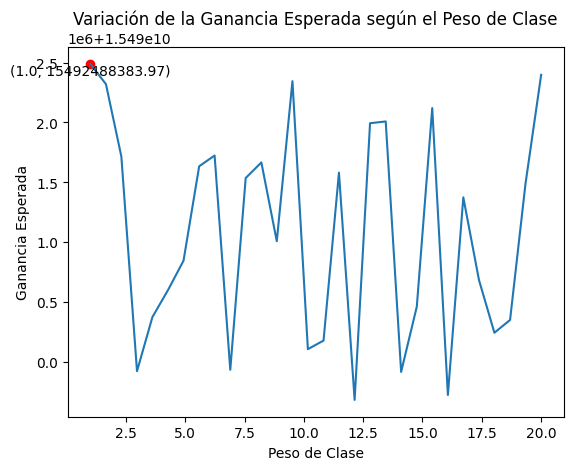

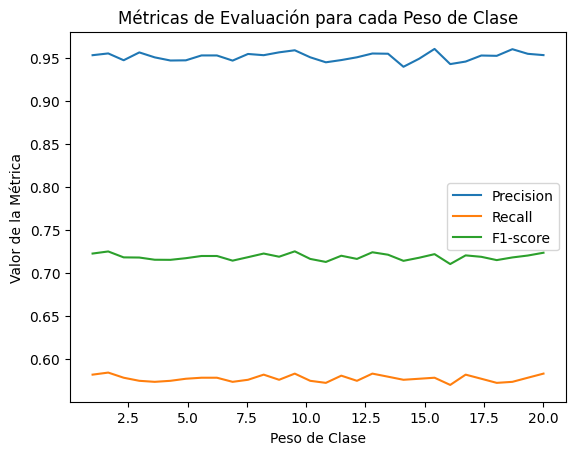

In [164]:
# Definir los diferentes pesos para ajustar el equilibrio de clases
# desbalance = 1/0.0018
# weights = np.linspace(1, desbalance, 20) 
weights = np.linspace(1, 20, 30) 
weights = np.round(weights, decimals=2)
profits = []
precision_scores = []
recall_scores = []
f1_scores = []

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Iterar sobre los diferentes pesos de clase
for i, weight in enumerate(weights):
    # Itero los distintos pesos para la clase fraude, por default se le asigna un peso de 1 a la clase no fraude
    class_weights = {0: 1, 1: weight} 

    # Crear y entrenar el modelo con los pesos de clase modificados
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
    model.fit(X_train_sc, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_sc)

    # Calcular las métricas de evaluación
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    #accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calcular las ganancias utilizando los porcentajes de ganancia y pérdida definidos
    results = X_test.copy()
    results['y_pred'] = y_pred
    results['y_test'] = y_test
    results['TP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 1), 1, 0)
    results['TN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 0), 1, 0)
    results['FP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 0), 1, 0)
    results['FN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 1), 1, 0)
    profit = (0.2 * results.loc[results['TN'] == 1, 'amount'].sum()) - results.loc[results['FN'] == 1, 'amount'].sum()
    profits.append(profit)

    # Imprimir los resultados
    print("Iteración:", i+1)
    print("Peso de clase:", weight)
    # print(classification_report(y_test,y_pred))
    print("--------------------")

# Gráfico de ganancias
max_index = profits.index(max(profits))
plt.plot(weights, profits)
plt.scatter(weights[max_index], profits[max_index], color='red', marker='o')
plt.xlabel('Peso de Clase')
plt.ylabel('Ganancia Esperada')
plt.title('Variación de la Ganancia Esperada según el Peso de Clase')
plt.annotate(f'({weights[max_index]}, {profits[max_index]:.2f})', xy=(weights[max_index], profits[max_index]),
             xytext=(weights[max_index], profits[max_index]-50),
             ha='center', va='top')
plt.show()

# Gráfico de métricas
plt.plot(weights, precision_scores, label='Precision')
plt.plot(weights, recall_scores, label='Recall')
plt.plot(weights, f1_scores, label='F1-score')
plt.xlabel('Peso de Clase')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas de Evaluación para cada Peso de Clase')
plt.legend()
plt.show()

#### 4.2.3 XGBoost

Iteración: 1
Peso de clase: 1.0
--------------------
Iteración: 2
Peso de clase: 2.69
--------------------
Iteración: 3
Peso de clase: 4.38
--------------------
Iteración: 4
Peso de clase: 6.07
--------------------
Iteración: 5
Peso de clase: 7.76
--------------------
Iteración: 6
Peso de clase: 9.45
--------------------
Iteración: 7
Peso de clase: 11.14
--------------------
Iteración: 8
Peso de clase: 12.83
--------------------
Iteración: 9
Peso de clase: 14.52
--------------------
Iteración: 10
Peso de clase: 16.21
--------------------
Iteración: 11
Peso de clase: 17.9
--------------------
Iteración: 12
Peso de clase: 19.59
--------------------
Iteración: 13
Peso de clase: 21.28
--------------------
Iteración: 14
Peso de clase: 22.97
--------------------
Iteración: 15
Peso de clase: 24.66
--------------------
Iteración: 16
Peso de clase: 26.34
--------------------
Iteración: 17
Peso de clase: 28.03
--------------------
Iteración: 18
Peso de clase: 29.72
--------------------
Iteración

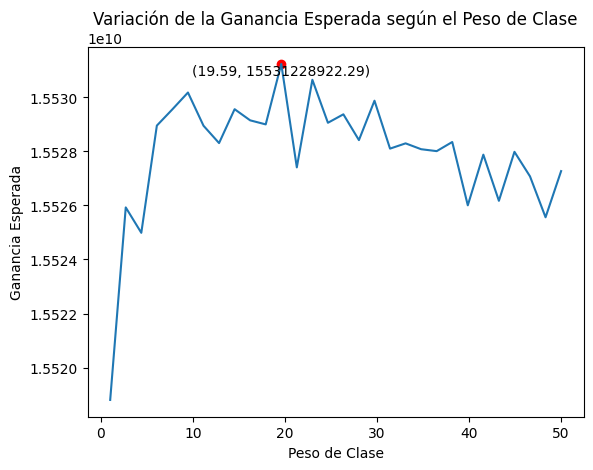

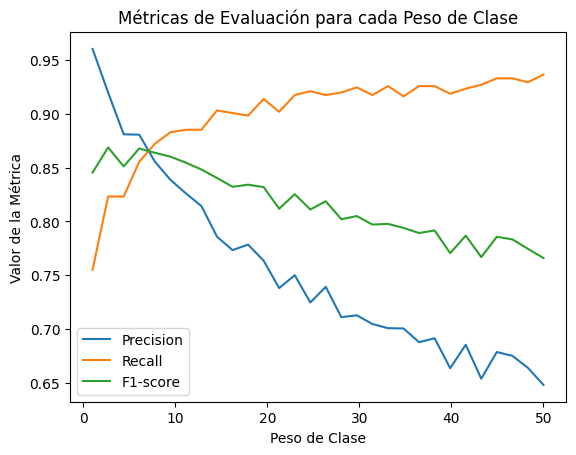

In [165]:
# Definir los diferentes pesos para ajustar el equilibrio de clases
# Probé primero con valores hasta el inverso del desequilibrio de clase, pero con pesos mayores a 10 la ganancia solo cae
# desbalance = 1/0.0018
# weights = np.linspace(1, desbalance, 30) 
weights = np.linspace(1, 50, 30) 
weights = np.round(weights, decimals=2)
profits = []
precision_scores = []
recall_scores = []
f1_scores = []

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Iterar sobre los diferentes pesos de clase
for i, weight in enumerate(weights):
    # Itero los distintos pesos para la clase fraude, por default se le asigna un peso de 1 a la clase no fraude
    class_weights = {0: 1, 1: weight} 

    # Crear y entrenar el modelo con los pesos de clase modificados
    model = xgb.XGBClassifier(random_state=42, scale_pos_weight=weight)
    model.fit(X_train_sc, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_sc)

    # Calcular las métricas de evaluación
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    #accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calcular las ganancias utilizando los porcentajes de ganancia y pérdida definidos
    results = X_test.copy()
    results['y_pred'] = y_pred
    results['y_test'] = y_test
    results['TP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 1), 1, 0)
    results['TN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 0), 1, 0)
    results['FP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 0), 1, 0)
    results['FN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 1), 1, 0)
    profit = (0.2 * results.loc[results['TN'] == 1, 'amount'].sum()) - results.loc[results['FN'] == 1, 'amount'].sum()
    profits.append(profit)

    # Imprimir los resultados
    print("Iteración:", i+1)
    print("Peso de clase:", weight)
    # print(classification_report(y_test,y_pred))
    print("--------------------")

# Gráfico de ganancias
max_index = profits.index(max(profits))
plt.plot(weights, profits)
plt.scatter(weights[max_index], profits[max_index], color='red', marker='o')
plt.xlabel('Peso de Clase')
plt.ylabel('Ganancia Esperada')
plt.title('Variación de la Ganancia Esperada según el Peso de Clase')
plt.annotate(f'({weights[max_index]}, {profits[max_index]:.2f})', xy=(weights[max_index], profits[max_index]),
             xytext=(weights[max_index], profits[max_index]-50),
             ha='center', va='top')
plt.show()

# Gráfico de métricas
plt.plot(weights, precision_scores, label='Precision')
plt.plot(weights, recall_scores, label='Recall')
plt.plot(weights, f1_scores, label='F1-score')
plt.xlabel('Peso de Clase')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas de Evaluación para cada Peso de Clase')
plt.legend()
plt.show()

#### 4.2.4 Comparación de modelos

In [18]:
# Modelos y pesos de clase con mayor ganancia neta
peso_opt_lr = 6.21
peso_opt_rf = 1
peso_opt_xgb = 19.59

# Regresión Logística
lr_model = LogisticRegressionCV(random_state=42, class_weight={0: 1, 1: peso_opt_lr}, max_iter=100)
lr_model.fit(X_train_sc, y_train)
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: peso_opt_rf})
rf_model.fit(X_train_sc, y_train)
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=peso_opt_xgb)
xgb_model.fit(X_train_sc, y_train)

compare()

,Recall,Precision,F1-Score,Accuracy,AUPRC,Profit
Logistic Regression,0.749104,0.778882,0.763703,0.999133,0.583933,15520841540.172005
Random Forest,0.58184,0.953033,0.722552,0.999164,0.555295,15492488383.966007
XGBoost,0.913978,0.763473,0.831974,0.999309,0.697959,15531228922.287994


##### 4.2.5 Modelo final para CASH_OUT

El modelo con mejor ganancia esperada fue un XGBoost con class_weights = {0: 1, 1: 19.59} 

Accuracy: 0.9993094972067039
Precision: 0.7634730538922155
Recall: 0.9139784946236559
F1: 0.831973898858075
AUC-ROC: 0.9567239466265238
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    446663
           1       0.76      0.91      0.83       837

    accuracy                           1.00    447500
   macro avg       0.88      0.96      0.92    447500
weighted avg       1.00      1.00      1.00    447500



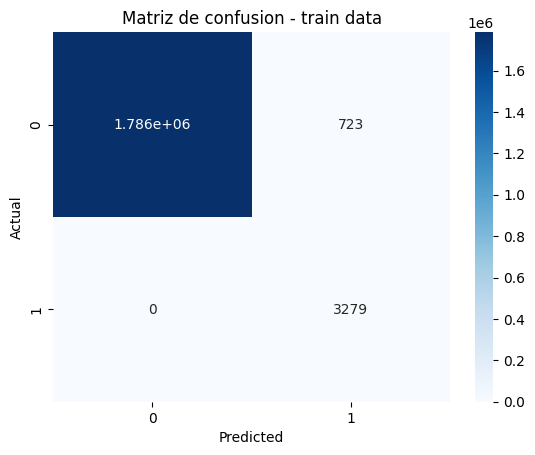

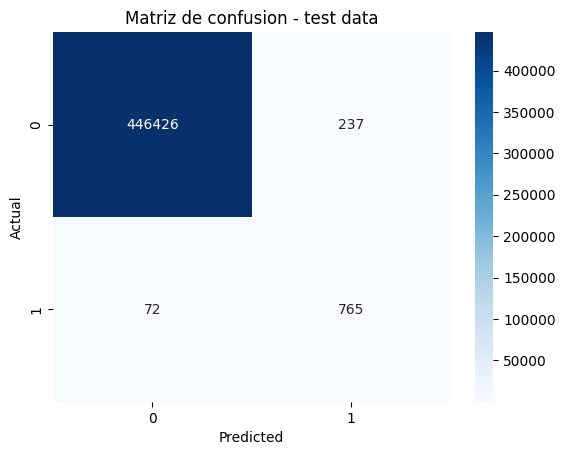

In [19]:
model = xgb.XGBClassifier(random_state=42, scale_pos_weight=19.59)
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
y_pred_is = model.predict(X_train_sc)

# Métricas de evaluación
evaluar(y_test, y_train, y_pred, y_pred_is)

### 4.3 Dataset entero

Dado que pueden ocurrir transacciones fraudulentas dentro de los tipos de transacción que no son TRANSFER ni CASH_OUT, a continuación se van a probar distintos pesos de clase usando el dataset entero.

In [6]:
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type']) + 1
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,4,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,4,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,5,181.00,181.0,0.00,0.0,0.0,1
3,1,2,181.00,181.0,0.00,21182.0,0.0,1
4,1,4,11668.14,41554.0,29885.86,0.0,0.0,0


In [7]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6271196,619,1,386385.08,4669568.85,5055953.92,506035.06,119649.98
1888243,164,1,212458.78,234635.00,447093.78,806037.88,593579.10
5549957,382,4,19967.60,3634.00,0.00,0.00,0.00
2025342,180,2,527616.51,180216.00,0.00,92157.10,619773.61
682342,36,5,206067.85,0.00,0.00,2131494.48,2337562.32


In [10]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)  # Estandarizamos los datos de entrenamiento
X_test_sc = scaler.transform(X_test)  # Aplicamos la misma transformación a los datos de prueba
X_test_df = pd.DataFrame(X_test_sc)
X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.head()

,0,1,2,3,4,5,6
0,2.639149,-1.269621,0.343453,1.328802,1.437536,-0.174992,-0.301147
1,-0.557841,-1.269621,0.054355,-0.207401,-0.139419,-0.086546,-0.171883
2,0.973904,0.952490,-0.265601,-0.287416,-0.292395,-0.324181,-0.333782
3,-0.445420,-0.528918,0.578206,-0.226251,-0.292395,-0.297011,-0.164739
4,-1.457215,1.693193,0.043732,-0.288675,-0.292395,0.304224,0.303786


#### 4.3.1 Regresión logística

Iteración: 1
Peso de clase: 1.0
--------------------
Iteración: 2
Peso de clase: 1.18
--------------------
Iteración: 3
Peso de clase: 1.37
--------------------
Iteración: 4
Peso de clase: 1.55
--------------------
Iteración: 5
Peso de clase: 1.73
--------------------
Iteración: 6
Peso de clase: 1.92
--------------------
Iteración: 7
Peso de clase: 2.1
--------------------
Iteración: 8
Peso de clase: 2.29
--------------------
Iteración: 9
Peso de clase: 2.47
--------------------
Iteración: 10
Peso de clase: 2.65
--------------------
Iteración: 11
Peso de clase: 2.84
--------------------
Iteración: 12
Peso de clase: 3.02
--------------------
Iteración: 13
Peso de clase: 3.2
--------------------
Iteración: 14
Peso de clase: 3.39
--------------------
Iteración: 15
Peso de clase: 3.57
--------------------
Iteración: 16
Peso de clase: 3.76
--------------------
Iteración: 17
Peso de clase: 3.94
--------------------
Iteración: 18
Peso de clase: 4.12
--------------------
Iteración: 19
Peso de 

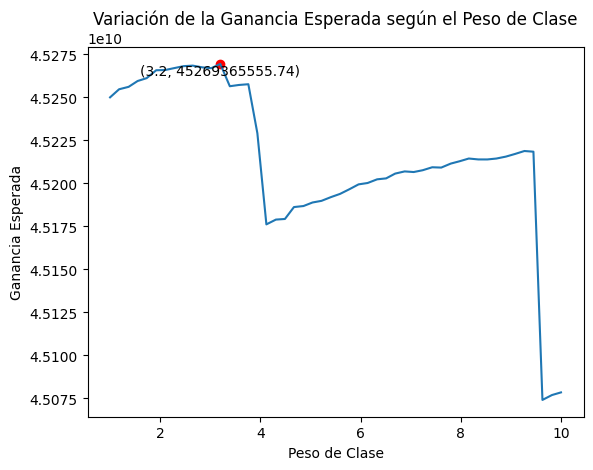

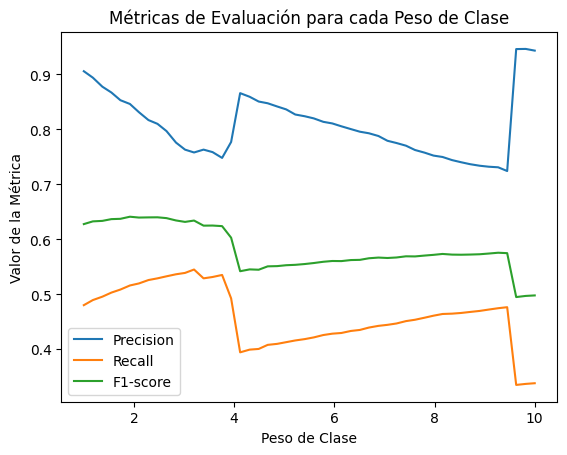

In [171]:
# Definir los diferentes pesos para ajustar el equilibrio de clases
# Probé primero con valores hasta el inverso del desequilibrio de clase, pero con pesos mayores a 10 la ganancia solo cae
# desbalance = 1/0.0013
# weights = np.linspace(1, desbalance, 30) 
weights = np.linspace(1, 10, 50) 
weights = np.round(weights, decimals=2)
profits = []
#accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Iterar sobre los diferentes pesos de clase
for i, weight in enumerate(weights):
    # Itero los distintos pesos para la clase fraude, por default se le asigna un peso de 1 a la clase no fraude
    class_weights = {0: 1, 1: weight} 

    # Crear y entrenar el modelo con los pesos de clase modificados
    model = LogisticRegressionCV(random_state=42, class_weight=class_weights, max_iter=100)
    model.fit(X_train_sc, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_sc)

    # Calcular las métricas de evaluación
    #accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    #accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calcular las ganancias utilizando los porcentajes de ganancia y pérdida definidos
    results = X_test.copy()
    results['y_pred'] = y_pred
    results['y_test'] = y_test
    results['TP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 1), 1, 0)
    results['TN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 0), 1, 0)
    results['FP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 0), 1, 0)
    results['FN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 1), 1, 0)
    profit = (0.2 * results.loc[results['TN'] == 1, 'amount'].sum()) - results.loc[results['FN'] == 1, 'amount'].sum()
    profits.append(profit)

    # Imprimir los resultados
    print("Iteración:", i+1)
    print("Peso de clase:", weight)
    # print(classification_report(y_test,y_pred))
    print("--------------------")

# Gráfico de ganancias
max_index = profits.index(max(profits))
plt.plot(weights, profits)
plt.scatter(weights[max_index], profits[max_index], color='red', marker='o')
plt.xlabel('Peso de Clase')
plt.ylabel('Ganancia Esperada')
plt.title('Variación de la Ganancia Esperada según el Peso de Clase')
plt.annotate(f'({weights[max_index]}, {profits[max_index]:.2f})', xy=(weights[max_index], profits[max_index]),
             xytext=(weights[max_index], profits[max_index]-50),
             ha='center', va='top')
plt.show()

# Gráfico de métricas
# plt.plot(weights, accuracy_scores, label='Accuracy') # no tiene sentido ver accuracy con este nivel de desbalance
plt.plot(weights, precision_scores, label='Precision')
plt.plot(weights, recall_scores, label='Recall')
plt.plot(weights, f1_scores, label='F1-score')
plt.xlabel('Peso de Clase')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas de Evaluación para cada Peso de Clase')
plt.legend()
plt.show()

#### 4.3.2 Random Forest

Iteración: 1
Peso de clase: 1.0
--------------------
Iteración: 2
Peso de clase: 1.47
--------------------
Iteración: 3
Peso de clase: 1.95
--------------------
Iteración: 4
Peso de clase: 2.42
--------------------
Iteración: 5
Peso de clase: 2.89
--------------------
Iteración: 6
Peso de clase: 3.37
--------------------
Iteración: 7
Peso de clase: 3.84
--------------------
Iteración: 8
Peso de clase: 4.32
--------------------
Iteración: 9
Peso de clase: 4.79
--------------------
Iteración: 10
Peso de clase: 5.26
--------------------
Iteración: 11
Peso de clase: 5.74
--------------------
Iteración: 12
Peso de clase: 6.21
--------------------
Iteración: 13
Peso de clase: 6.68
--------------------
Iteración: 14
Peso de clase: 7.16
--------------------
Iteración: 15
Peso de clase: 7.63
--------------------
Iteración: 16
Peso de clase: 8.11
--------------------
Iteración: 17
Peso de clase: 8.58
--------------------
Iteración: 18
Peso de clase: 9.05
--------------------
Iteración: 19
Peso d

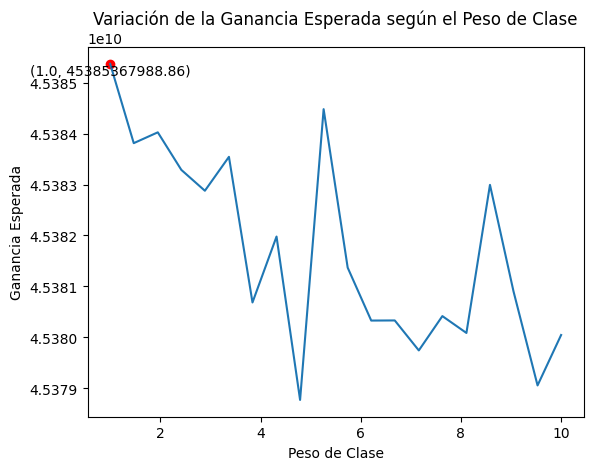

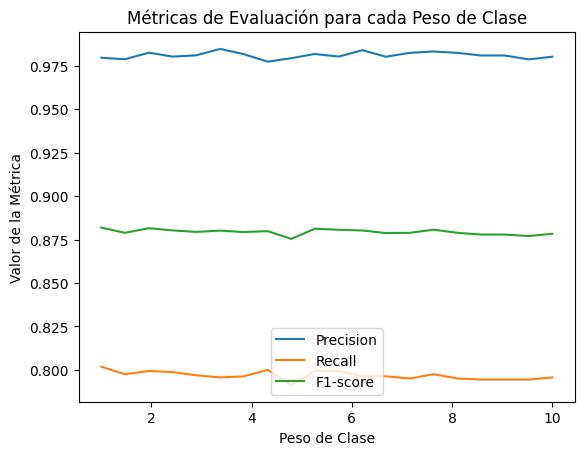

In [25]:
# Definir los diferentes pesos para ajustar el equilibrio de clases
# desbalance = 1/0.0013
# weights = np.linspace(1, desbalance, 20) 
weights = np.linspace(1, 10, 20) 
weights = np.round(weights, decimals=2)
profits = []
#accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Iterar sobre los diferentes pesos de clase
for i, weight in enumerate(weights):
    # Itero los distintos pesos para la clase fraude, por default se le asigna un peso de 1 a la clase no fraude
    class_weights = {0: 1, 1: weight} 

    # Crear y entrenar el modelo con los pesos de clase modificados
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
    model.fit(X_train_sc, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_sc)

    # Calcular las métricas de evaluación
    #accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    #accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calcular las ganancias utilizando los porcentajes de ganancia y pérdida definidos
    results = X_test.copy()
    results['y_pred'] = y_pred
    results['y_test'] = y_test
    results['TP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 1), 1, 0)
    results['TN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 0), 1, 0)
    results['FP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 0), 1, 0)
    results['FN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 1), 1, 0)
    profit = (0.2 * results.loc[results['TN'] == 1, 'amount'].sum()) - results.loc[results['FN'] == 1, 'amount'].sum()
    profits.append(profit)

    # Imprimir los resultados
    print("Iteración:", i+1)
    print("Peso de clase:", weight)
    # print(classification_report(y_test,y_pred))
    print("--------------------")

# Gráfico de ganancias
max_index = profits.index(max(profits))
plt.plot(weights, profits)
plt.scatter(weights[max_index], profits[max_index], color='red', marker='o')
plt.xlabel('Peso de Clase')
plt.ylabel('Ganancia Esperada')
plt.title('Variación de la Ganancia Esperada según el Peso de Clase')
plt.annotate(f'({weights[max_index]}, {profits[max_index]:.2f})', xy=(weights[max_index], profits[max_index]),
             xytext=(weights[max_index], profits[max_index]-50),
             ha='center', va='top')
plt.show()

# Gráfico de métricas
# plt.plot(weights, accuracy_scores, label='Accuracy') # no tiene sentido ver accuracy con este nivel de desbalance
plt.plot(weights, precision_scores, label='Precision')
plt.plot(weights, recall_scores, label='Recall')
plt.plot(weights, f1_scores, label='F1-score')
plt.xlabel('Peso de Clase')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas de Evaluación para cada Peso de Clase')
plt.legend()
plt.show()

#### 4.3.3 XGBoost

Iteración: 1
Peso de clase: 1.0
--------------------
Iteración: 2
Peso de clase: 3.58
--------------------
Iteración: 3
Peso de clase: 6.16
--------------------
Iteración: 4
Peso de clase: 8.74
--------------------
Iteración: 5
Peso de clase: 11.32
--------------------
Iteración: 6
Peso de clase: 13.89
--------------------
Iteración: 7
Peso de clase: 16.47
--------------------
Iteración: 8
Peso de clase: 19.05
--------------------
Iteración: 9
Peso de clase: 21.63
--------------------
Iteración: 10
Peso de clase: 24.21
--------------------
Iteración: 11
Peso de clase: 26.79
--------------------
Iteración: 12
Peso de clase: 29.37
--------------------
Iteración: 13
Peso de clase: 31.95
--------------------
Iteración: 14
Peso de clase: 34.53
--------------------
Iteración: 15
Peso de clase: 37.11
--------------------
Iteración: 16
Peso de clase: 39.68
--------------------
Iteración: 17
Peso de clase: 42.26
--------------------
Iteración: 18
Peso de clase: 44.84
--------------------
Iterac

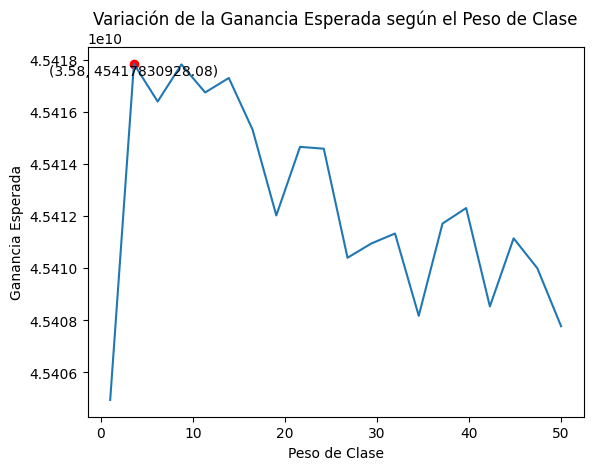

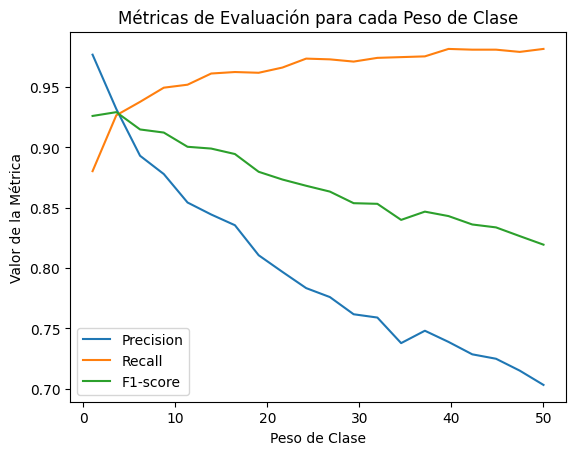

In [26]:
# Definir los diferentes pesos para ajustar el equilibrio de clases
# Probé primero con valores hasta el inverso del desequilibrio de clase, pero con pesos mayores a 50 la ganancia solo cae
# desbalance = 1/0.0018
# weights = np.linspace(1, desbalance, 20) 
weights = np.linspace(1, 50, 20) 
weights = np.round(weights, decimals=2)
profits = []
precision_scores = []
recall_scores = []
f1_scores = []

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Iterar sobre los diferentes pesos de clase
for i, weight in enumerate(weights):
    # Itero los distintos pesos para la clase fraude, por default se le asigna un peso de 1 a la clase no fraude
    class_weights = {0: 1, 1: weight} 

    # Crear y entrenar el modelo con los pesos de clase modificados
    model = xgb.XGBClassifier(random_state=42, scale_pos_weight=weight)
    model.fit(X_train_sc, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_sc)

    # Calcular las métricas de evaluación
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    #accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calcular las ganancias utilizando los porcentajes de ganancia y pérdida definidos
    results = X_test.copy()
    results['y_pred'] = y_pred
    results['y_test'] = y_test
    results['TP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 1), 1, 0)
    results['TN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 0), 1, 0)
    results['FP'] = np.where((results['y_pred'] == 1) & (results['y_test'] == 0), 1, 0)
    results['FN'] = np.where((results['y_pred'] == 0) & (results['y_test'] == 1), 1, 0)
    profit = (0.2 * results.loc[results['TN'] == 1, 'amount'].sum()) - results.loc[results['FN'] == 1, 'amount'].sum()
    profits.append(profit)

    # Imprimir los resultados
    print("Iteración:", i+1)
    print("Peso de clase:", weight)
    # print(classification_report(y_test,y_pred))
    print("--------------------")

# Gráfico de ganancias
max_index = profits.index(max(profits))
plt.plot(weights, profits)
plt.scatter(weights[max_index], profits[max_index], color='red', marker='o')
plt.xlabel('Peso de Clase')
plt.ylabel('Ganancia Esperada')
plt.title('Variación de la Ganancia Esperada según el Peso de Clase')
plt.annotate(f'({weights[max_index]}, {profits[max_index]:.2f})', xy=(weights[max_index], profits[max_index]),
             xytext=(weights[max_index], profits[max_index]-50),
             ha='center', va='top')
plt.show()

# Gráfico de métricas
plt.plot(weights, precision_scores, label='Precision')
plt.plot(weights, recall_scores, label='Recall')
plt.plot(weights, f1_scores, label='F1-score')
plt.xlabel('Peso de Clase')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas de Evaluación para cada Peso de Clase')
plt.legend()
plt.show()

#### 4.3.4 Comparación de modelos

In [27]:
# Modelos y pesos de clase con mayor ganancia neta
peso_opt_lr = 3.2
peso_opt_rf = 1
peso_opt_xgb = 3.58

# Regresión Logística
lr_model = LogisticRegressionCV(random_state=42, class_weight={0: 1, 1: peso_opt_lr}, max_iter=100)
lr_model.fit(X_train_sc, y_train)
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: peso_opt_rf})
rf_model.fit(X_train_sc, y_train)
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=peso_opt_xgb)
xgb_model.fit(X_train_sc, y_train)

compare()

,Recall,Precision,F1-Score,Accuracy,AUPRC,Profit
Logistic Regression,0.545062,0.75794,0.634111,0.999199,0.413703,45269365555.741989
Random Forest,0.801852,0.979638,0.881874,0.999727,0.785777,45385367988.860016
XGBoost,0.926543,0.931719,0.929124,0.99982,0.863372,45417830928.080009


#### 4.3.5 Modelo final con el dataset entero

El modelo con mejor ganancia esperada fue un XGBoost con class_weights = {0: 1, 1: 3.58} 

Accuracy: 0.9998200426868177
Precision: 0.9317194289261328
Recall: 0.9265432098765433
F1: 0.9291241101826061
AUC-ROC: 0.9632283286561922
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.93      0.93      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.96      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524



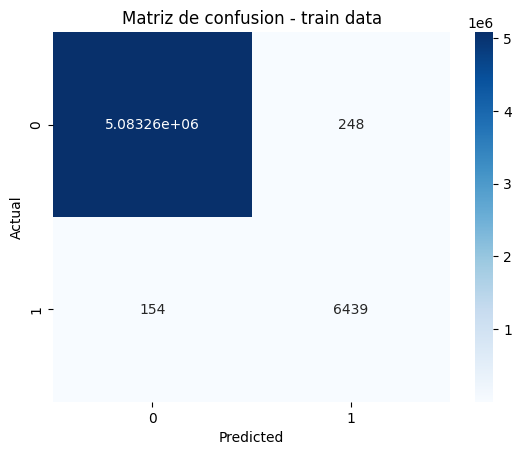

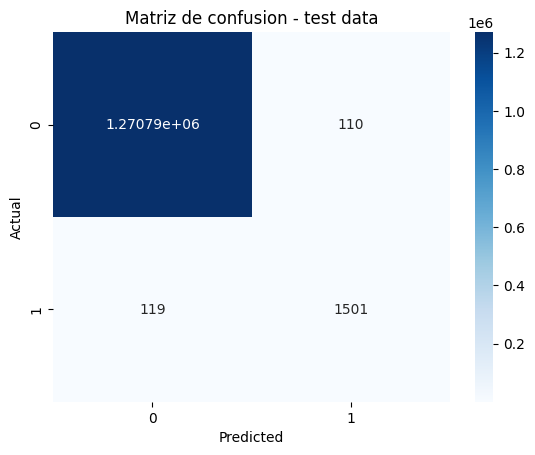

In [14]:
model = xgb.XGBClassifier(random_state=42, scale_pos_weight=3.58)
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
y_pred_is = model.predict(X_train_sc)

# Métricas de evaluación
evaluar(y_test, y_train, y_pred, y_pred_is)

## 5. Comparación de modelos segmentados y no segmentados

In [47]:
train = X_train.copy()
train['y_pred'] = y_pred_is
train['y_train'] = y_train
test = X_test.copy()
test['y_pred'] = y_pred
test['y_test'] = y_test
test.head()

transfer_train = train[train['type'] == 5].copy()
transfer_test = test[test['type'] == 5].copy()
cashout_train = train[train['type'] == 2].copy()
cashout_test = test[test['type'] == 2].copy()

Accuracy: 0.9999530397377739
Precision: 0.9987593052109182
Recall: 0.9950556242274413
F1: 0.9969040247678018
AUC-ROC: 0.997523080133103
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105664
           1       1.00      1.00      1.00       809

    accuracy                           1.00    106473
   macro avg       1.00      1.00      1.00    106473
weighted avg       1.00      1.00      1.00    106473



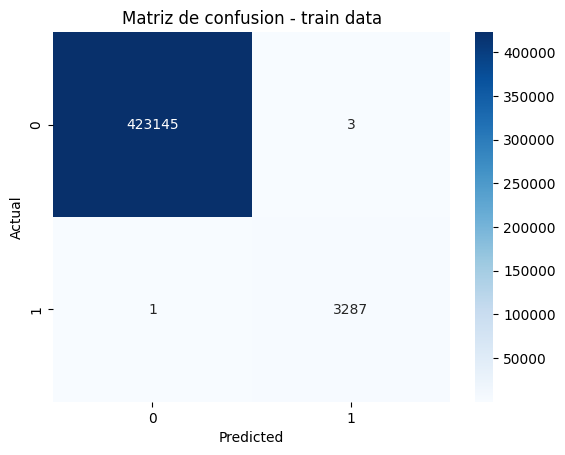

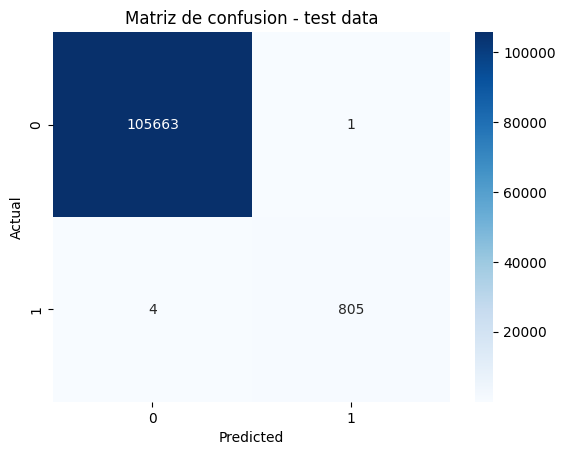

In [45]:
# Performance del modelo entrenado con full dataset, segmento transfer
# evaluar(y_test, y_train, y_pred, y_pred_is)
evaluar(transfer_test['y_test'], transfer_train['y_train'], transfer_test['y_pred'], transfer_train['y_pred'])

In [51]:
transfer_test['TN'] = np.where((transfer_test['y_pred'] == 0) & (transfer_test['y_test'] == 0), 1, 0)
transfer_test['FN'] = np.where((transfer_test['y_pred'] == 0) & (transfer_test['y_test'] == 1), 1, 0)
profit = (0.2 * transfer_test.loc[transfer_test['TN'] == 1, 'amount'].sum()) - transfer_test.loc[transfer_test['FN'] == 1, 'amount'].sum()
print(profit)

19290524868.698


Ganancia neta obtenida para el segmento transfer con el modelo segmentado: 19,268,797,990.022

Ganancia neta obtenida con el modelo entrenado con toda la data disponible: 19,290,524,868.698

Accuracy: 0.9994987827581269
Precision: 0.8645962732919255
Recall: 0.8581997533908755
F1: 0.8613861386138614
AUC-ROC: 0.9289777070522403
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    446101
           1       0.86      0.86      0.86       811

    accuracy                           1.00    446912
   macro avg       0.93      0.93      0.93    446912
weighted avg       1.00      1.00      1.00    446912



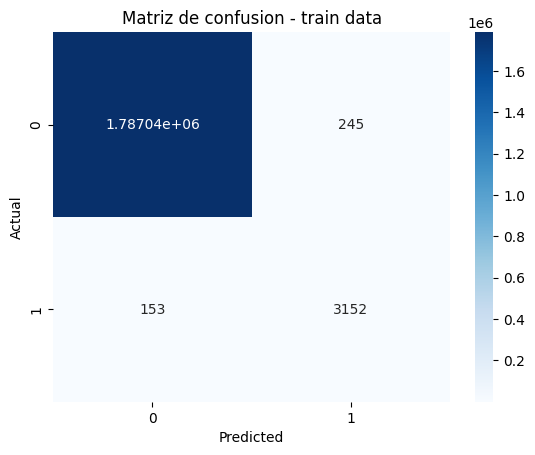

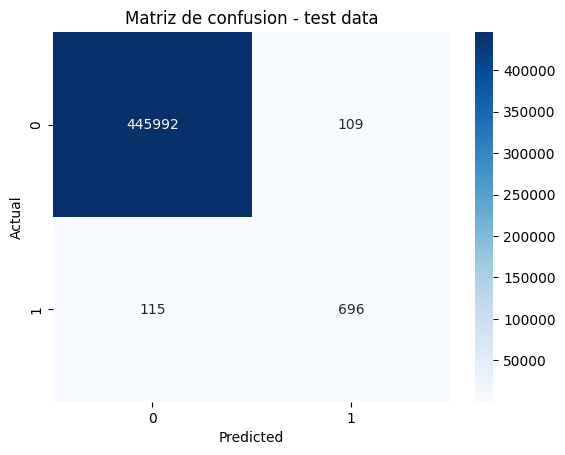

In [46]:
# Performance del modelo entrenado con full dataset, segmento cash out
evaluar(cashout_test['y_test'], cashout_train['y_train'], cashout_test['y_pred'], cashout_train['y_pred'])

In [52]:
cashout_test['TN'] = np.where((cashout_test['y_pred'] == 0) & (cashout_test['y_test'] == 0), 1, 0)
cashout_test['FN'] = np.where((cashout_test['y_pred'] == 0) & (cashout_test['y_test'] == 1), 1, 0)
profit = (0.2 * cashout_test.loc[cashout_test['TN'] == 1, 'amount'].sum()) - cashout_test.loc[cashout_test['FN'] == 1, 'amount'].sum()
print(profit)

15526309276.898003


Ganancia neta obtenida para el segmento cash out con el modelo segmentado: 15,531,228,922.29

Ganancia neta obtenida con el modelo entrenado con toda la data disponible: 15,526,309,276.90

## 6. Conclusiones

En este trabajo se evaluaron distintos pesos de clase en modelos de regresión logística, Random Forest y XGBoost con el objetivo de detectar fraude en transacciones financieras y maximizar la ganancia neta. En este caso particular, las transacciones fraudulentas se encontraban exclusivamente en los segmentos "transfer" y "cash_out". Se observó que los modelos segmentados, que se entrenaron específicamente para los segmentos "transfer" y "cash_out", presentaron tiempos de ejecución más rápidos debido a que se trabaja con menos observaciones en cada modelo. Sin embargo, es importante destacar que al utilizar modelos segmentados, existe el riesgo de no detectar futuros fraudes en otros tipos de transacción. 

Al analizar los resultados obtenidos, se observó que para el segmento "transfer", la ganancia neta obtenida con el modelo entrenado con toda la información disponible fue mayor en comparación con el modelo segmentado. Por otro lado, para el segmento "cash_out", se logró maximizar la ganancia neta utilizando únicamente el modelo entrenado con datos pertenecientes a ese segmento. Puede ocurrir que las transacciones "cash_out" tengan características únicas que el modelo general podría pasar por alto. Otro punto a tener en cuenta es que los diferentes tipos de transacción pueden tener interacciones complejas entre sí. Por ejemplo, ciertos fraudes podrían involucrar transacciones que comienzan como "transfer" y luego se convierten en "cash_out". Si los modelos segmentados no capturan estas interacciones, podría haber una disminución en la ganancia neta general.

En resumen, la elección entre utilizar modelos segmentados o modelos generales debe considerar el equilibrio entre la velocidad de ejecución y la capacidad de detectar fraudes en diferentes tipos de transacciones. 